# Produce plots of distributions to include in the Brunel results section of the thesis

We start be importing the dataframe.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (8,4) # seems like this size gives best size when inserting the figure in latex
#plt.rcParams['figure.figsize'] = (14,10)  # to examine better here
import numpy as np
from scipy.stats import probplot
from scipy.stats import normaltest
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

In [2]:
cm = 1/2.54  # centimeters in inches
#plt.rcParams['figure.figsize'] = (8*cm,7*cm)# used this in the beginning, but want shorter images (height)
plt.rcParams['figure.figsize'] = (12*cm,11*cm)

In [3]:
df = pd.read_pickle('structured_df.pkl')

In [4]:
#fig_path = 'C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures' # for thesis paper
fig_path = 'C:\\Users\\Nida\\Documents\\NMBU\\master\\Presentation' # for presentation

Want to show example of how ten ecdf curves of statistic becomes one mean ecdf curve. Do this for droop model resolution 1/8, CV values. 

In [5]:
def get_mean_list(model):
    cv_list = []
    for i in range(1,11):
        cvs = model[i].values
        cv_list.append(cvs)
    mean_list = np.mean(cv_list,axis=0)
    return mean_list

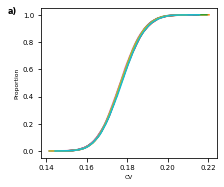

In [13]:
for i in range(1,11):
    cv = df.loc['droop',8,i]['CV'].values
    plt.plot(np.sort(cv), np.linspace(0, 1, len(cv), endpoint=False),label=i)
    
plt.xlabel('CV',fontsize=6);
plt.ylabel('Proportion',fontsize=6);
plt.xticks(fontsize=7);
plt.yticks(fontsize=7);
textstr = 'a)'
plt.text(-0.025, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\all_CV_1_8_brunel_ecdf.pdf'.format(fig_path),bbox_inches='tight')

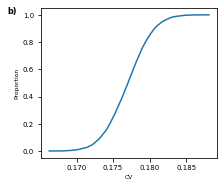

In [14]:
ref = get_mean_list(df.loc['droop',8]['CV'])  
plt.plot(np.sort(ref), np.linspace(0, 1, len(ref), endpoint=False));
plt.xlabel('CV',fontsize=6);
plt.ylabel('Proportion',fontsize=6);
plt.xticks(fontsize=7);
plt.yticks(fontsize=7);
textstr = 'b)'
plt.text(-0.025, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\mean_CV_1_8_brunel_ecdf.pdf'.format(fig_path),bbox_inches='tight')

Now create the plots of all the mean distributions.

In [6]:
m = 9
col = plt.cm.viridis(np.linspace(0, 1, m)) #colorblind friendly

In [7]:
def get_mean_list(model):
    fr_list = []
    for i in range(1,11):
        frs = model[i].values
        frs = [float(x)*1000 for x in frs]
        fr_list.append(frs)
    mean_list = np.mean(fr_list,axis=0)
    return mean_list

# Mean FR curve all models

In [8]:
p01=get_mean_list(df.loc['droop','FR'][2])
p02=get_mean_list(df.loc['droop','FR'][4])
p03=get_mean_list(df.loc['droop','FR'][8])
p04=get_mean_list(df.loc['droop','FR'][16])
p05=get_mean_list(df.loc['droop','FR'][32])
p06=get_mean_list(df.loc['droop','FR'][64])
p07=get_mean_list(df.loc['droop','FR'][128])
p08=get_mean_list(df.loc['droop','FR'][256])
p09=get_mean_list(df.loc['continuous','FR'][8])

q01=get_mean_list(df.loc['equal','FR'][2])
q02=get_mean_list(df.loc['equal','FR'][4])
q03=get_mean_list(df.loc['equal','FR'][8])
q04=get_mean_list(df.loc['equal','FR'][16])
q05=get_mean_list(df.loc['equal','FR'][32])
q06=get_mean_list(df.loc['equal','FR'][64])
q07=get_mean_list(df.loc['equal','FR'][128])
q08=get_mean_list(df.loc['equal','FR'][256])

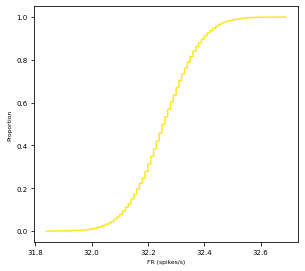

In [13]:

# continuous model
plt.plot(np.sort(p09), np.linspace(0, 1, len(p09), endpoint=False),color=col[8],label='continuous') # yellow
#plt.legend(prop={'size': 4})
plt.xlabel('FR (spikes/s)',fontsize=6);
plt.ylabel('Proportion',fontsize=6);
plt.xticks(fontsize=7);
plt.yticks(fontsize=7);
#textstr = 'a)'
#plt.text(-0.025, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\mean_FR_brunel_cont.pdf'.format(fig_path),bbox_inches='tight')
# for analysis, not for ploting in thesis:
#plt.grid()

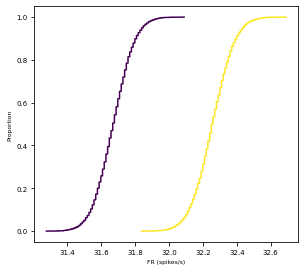

In [14]:
plt.plot(np.sort(p01), np.linspace(0, 1, len(p01), endpoint=False),color=col[0],label='1/2')
# continuous model
plt.plot(np.sort(p09), np.linspace(0, 1, len(p09), endpoint=False),color=col[8],label='continuous') # yellow
#plt.legend(prop={'size': 4})
plt.xlabel('FR (spikes/s)',fontsize=6);
plt.ylabel('Proportion',fontsize=6);
plt.xticks(fontsize=7);
plt.yticks(fontsize=7);
#textstr = 'a)'
#plt.text(-0.025, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\mean_FR_brunel_cont_droop2.pdf'.format(fig_path),bbox_inches='tight')
# for analysis, not for ploting in thesis:
#plt.grid()

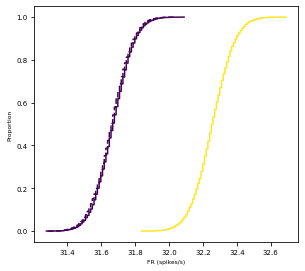

In [15]:
plt.plot(np.sort(p01), np.linspace(0, 1, len(p01), endpoint=False),color=col[0],label='1/2')
plt.plot(np.sort(q01), np.linspace(0, 1, len(q01), endpoint=False),linestyle='dashed',color=col[0])
# continuous model
plt.plot(np.sort(p09), np.linspace(0, 1, len(p09), endpoint=False),color=col[8],label='continuous') # yellow
#plt.legend(prop={'size': 4})
plt.xlabel('FR (spikes/s)',fontsize=6);
plt.ylabel('Proportion',fontsize=6);
plt.xticks(fontsize=7);
plt.yticks(fontsize=7);
#textstr = 'a)'
#plt.text(-0.025, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\mean_FR_brunel_cont_droop2_equal2.pdf'.format(fig_path),bbox_inches='tight')
# for analysis, not for ploting in thesis:
#plt.grid()

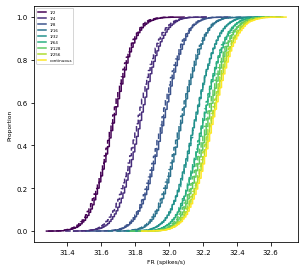

In [16]:
# droop models
plt.plot(np.sort(p01), np.linspace(0, 1, len(p01), endpoint=False),color=col[0],label='1/2')
plt.plot(np.sort(p02), np.linspace(0, 1, len(p02), endpoint=False),color=col[1],label='1/4')
plt.plot(np.sort(p03), np.linspace(0, 1, len(p03), endpoint=False),color=col[2],label='1/8')
plt.plot(np.sort(p04), np.linspace(0, 1, len(p04), endpoint=False),color=col[3],label='1/16')
plt.plot(np.sort(p05), np.linspace(0, 1, len(p05), endpoint=False),color=col[4],label='1/32')
plt.plot(np.sort(p06), np.linspace(0, 1, len(p06), endpoint=False),color=col[5],label='1/64')
plt.plot(np.sort(p07), np.linspace(0, 1, len(p07), endpoint=False),color=col[6],label='1/128')#medium green
plt.plot(np.sort(p08), np.linspace(0, 1, len(p08), endpoint=False),color=col[7],label='1/256') #light green
# equal models
plt.plot(np.sort(q01), np.linspace(0, 1, len(q01), endpoint=False),linestyle='dashed',color=col[0])
plt.plot(np.sort(q02), np.linspace(0, 1, len(q02), endpoint=False),linestyle='dashed',color=col[1])
plt.plot(np.sort(q03), np.linspace(0, 1, len(q03), endpoint=False),linestyle='dashed',color=col[2])
plt.plot(np.sort(q04), np.linspace(0, 1, len(q04), endpoint=False),linestyle='dashed',color=col[3])
plt.plot(np.sort(q05), np.linspace(0, 1, len(q05), endpoint=False),linestyle='dashed',color=col[4])
plt.plot(np.sort(q06), np.linspace(0, 1, len(q06), endpoint=False),linestyle='dashed',color=col[5])
plt.plot(np.sort(q07), np.linspace(0, 1, len(q07), endpoint=False),linestyle='dashed',color=col[6]) #medium green
plt.plot(np.sort(q08), np.linspace(0, 1, len(q08), endpoint=False),linestyle='dashed',color=col[7]) #light green
# continuous model
plt.plot(np.sort(p09), np.linspace(0, 1, len(p09), endpoint=False),color=col[8],label='continuous') # yellow
plt.legend(prop={'size': 4})
plt.xlabel('FR (spikes/s)',fontsize=6);
plt.ylabel('Proportion',fontsize=6);
plt.xticks(fontsize=7);
plt.yticks(fontsize=7);
#textstr = 'a)'
#plt.text(-0.025, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\mean_FR_brunel_ecdf.pdf'.format(fig_path),bbox_inches='tight')
# for analysis, not for ploting in thesis:
#plt.grid()

In [10]:
def get_mean_list(model):
    cv_list = []
    for i in range(1,11):
        cvs = model[i].values
        cv_list.append(cvs)
    mean_list = np.mean(cv_list,axis=0)
    return mean_list

# Mean CV curves all models

In [11]:
p01=get_mean_list(df.loc['droop','CV'][2])
p02=get_mean_list(df.loc['droop','CV'][4])
p03=get_mean_list(df.loc['droop','CV'][8])
p04=get_mean_list(df.loc['droop','CV'][16])
p05=get_mean_list(df.loc['droop','CV'][32])
p06=get_mean_list(df.loc['droop','CV'][64])
p07=get_mean_list(df.loc['droop','CV'][128])
p08=get_mean_list(df.loc['droop','CV'][256])
p09=get_mean_list(df.loc['continuous','CV'][8])

q01=get_mean_list(df.loc['equal','CV'][2])
q02=get_mean_list(df.loc['equal','CV'][4])
q03=get_mean_list(df.loc['equal','CV'][8])
q04=get_mean_list(df.loc['equal','CV'][16])
q05=get_mean_list(df.loc['equal','CV'][32])
q06=get_mean_list(df.loc['equal','CV'][64])
q07=get_mean_list(df.loc['equal','CV'][128])
q08=get_mean_list(df.loc['equal','CV'][256])

Make equal model dashed lines. And make droop and equal model with same resolution the same color so it is easy to compare.

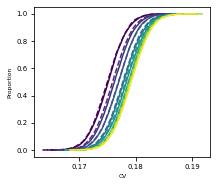

In [12]:
# droop models
plt.plot(np.sort(p01), np.linspace(0, 1, len(p01), endpoint=False),color=col[0],label='1/2')
plt.plot(np.sort(p02), np.linspace(0, 1, len(p02), endpoint=False),color=col[1],label='1/4')
plt.plot(np.sort(p03), np.linspace(0, 1, len(p03), endpoint=False),color=col[2],label='1/8')
plt.plot(np.sort(p04), np.linspace(0, 1, len(p04), endpoint=False),color=col[3],label='1/16')
plt.plot(np.sort(p05), np.linspace(0, 1, len(p05), endpoint=False),color=col[4],label='1/32')
plt.plot(np.sort(p06), np.linspace(0, 1, len(p06), endpoint=False),color=col[5],label='1/64')
plt.plot(np.sort(p07), np.linspace(0, 1, len(p07), endpoint=False),color=col[6],label='1/128')#medium green
plt.plot(np.sort(p08), np.linspace(0, 1, len(p08), endpoint=False),color=col[7],label='1/256') #light green
# equal models
plt.plot(np.sort(q01), np.linspace(0, 1, len(q01), endpoint=False),linestyle='dashed',color=col[0])
plt.plot(np.sort(q02), np.linspace(0, 1, len(q02), endpoint=False),linestyle='dashed',color=col[1])
plt.plot(np.sort(q03), np.linspace(0, 1, len(q03), endpoint=False),linestyle='dashed',color=col[2])
plt.plot(np.sort(q04), np.linspace(0, 1, len(q04), endpoint=False),linestyle='dashed',color=col[3])
plt.plot(np.sort(q05), np.linspace(0, 1, len(q05), endpoint=False),linestyle='dashed',color=col[4])
plt.plot(np.sort(q06), np.linspace(0, 1, len(q06), endpoint=False),linestyle='dashed',color=col[5])
plt.plot(np.sort(q07), np.linspace(0, 1, len(q07), endpoint=False),linestyle='dashed',color=col[6]) #medium green
plt.plot(np.sort(q08), np.linspace(0, 1, len(q08), endpoint=False),linestyle='dashed',color=col[7]) #light green
# continuous model
plt.plot(np.sort(p09), np.linspace(0, 1, len(p09), endpoint=False),color=col[8],label='continuous') # yellow
plt.xlabel('CV',fontsize=6);
plt.ylabel('Proportion',fontsize=6);
plt.xticks(fontsize=7);
plt.yticks(fontsize=7);
#textstr = 'c)'
#plt.text(-0.025, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\mean_CV_brunel_ecdf.pdf'.format(fig_path),bbox_inches='tight')
# only for analysis, not to be included in thesis figures:
#plt.grid()

We should do this for the FR distributions as well.

# Mean CC_5 curve all models

In [13]:
p01=get_mean_list(df.loc['droop','CC_5'][2])
p02=get_mean_list(df.loc['droop','CC_5'][4])
p03=get_mean_list(df.loc['droop','CC_5'][8])
p04=get_mean_list(df.loc['droop','CC_5'][16])
p05=get_mean_list(df.loc['droop','CC_5'][32])
p06=get_mean_list(df.loc['droop','CC_5'][64])
p07=get_mean_list(df.loc['droop','CC_5'][128])
p08=get_mean_list(df.loc['droop','CC_5'][256])
p09=get_mean_list(df.loc['continuous','CC_5'][8])

q01=get_mean_list(df.loc['equal','CC_5'][2])
q02=get_mean_list(df.loc['equal','CC_5'][4])
q03=get_mean_list(df.loc['equal','CC_5'][8])
q04=get_mean_list(df.loc['equal','CC_5'][16])
q05=get_mean_list(df.loc['equal','CC_5'][32])
q06=get_mean_list(df.loc['equal','CC_5'][64])
q07=get_mean_list(df.loc['equal','CC_5'][128])
q08=get_mean_list(df.loc['equal','CC_5'][256])

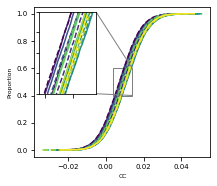

In [14]:
# droop models

fig, ax = plt.subplots()

ax.plot(np.sort(p01), np.linspace(0, 1, len(p01), endpoint=False),color=col[0],label='1/2')
ax.plot(np.sort(p02), np.linspace(0, 1, len(p02), endpoint=False),color=col[1],label='1/4')
ax.plot(np.sort(p03), np.linspace(0, 1, len(p03), endpoint=False),color=col[2],label='1/8')
ax.plot(np.sort(p04), np.linspace(0, 1, len(p04), endpoint=False),color=col[3],label='1/16')
ax.plot(np.sort(p05), np.linspace(0, 1, len(p05), endpoint=False),color=col[4],label='1/32')
ax.plot(np.sort(p06), np.linspace(0, 1, len(p06), endpoint=False),color=col[5],label='1/64')
ax.plot(np.sort(p07), np.linspace(0, 1, len(p07), endpoint=False),color=col[6],label='1/128')#medium green
ax.plot(np.sort(p08), np.linspace(0, 1, len(p08), endpoint=False),color=col[7],label='1/256') #light green
# equal models
ax.plot(np.sort(q01), np.linspace(0, 1, len(q01), endpoint=False),linestyle='dashed',color=col[0])
ax.plot(np.sort(q02), np.linspace(0, 1, len(q02), endpoint=False),linestyle='dashed',color=col[1])
ax.plot(np.sort(q03), np.linspace(0, 1, len(q03), endpoint=False),linestyle='dashed',color=col[2])
ax.plot(np.sort(q04), np.linspace(0, 1, len(q04), endpoint=False),linestyle='dashed',color=col[3])
ax.plot(np.sort(q05), np.linspace(0, 1, len(q05), endpoint=False),linestyle='dashed',color=col[4])
ax.plot(np.sort(q06), np.linspace(0, 1, len(q06), endpoint=False),linestyle='dashed',color=col[5])
ax.plot(np.sort(q07), np.linspace(0, 1, len(q07), endpoint=False),linestyle='dashed',color=col[6]) #medium green
ax.plot(np.sort(q08), np.linspace(0, 1, len(q08), endpoint=False),linestyle='dashed',color=col[7]) #light green
# continuous model
ax.plot(np.sort(p09), np.linspace(0, 1, len(p09), endpoint=False),color=col[8],label='continuous') # yellow

plt.xlabel('CC',fontsize=6);
plt.ylabel('Proportion',fontsize=6);
plt.xticks(fontsize=7);
plt.yticks(fontsize=7);


# code to fix zoomed in version
axins1 = zoomed_inset_axes(ax, zoom = 3, loc=2)
axins1.plot(np.sort(p01),np.linspace(0, 1, len(p01), endpoint=False),color=col[0])
axins1.plot(np.sort(p02),np.linspace(0, 1, len(p02), endpoint=False),color=col[1])
axins1.plot(np.sort(p03), np.linspace(0, 1, len(p03), endpoint=False),color=col[2])
axins1.plot(np.sort(p04), np.linspace(0, 1, len(p04), endpoint=False),color=col[3])
axins1.plot(np.sort(p05), np.linspace(0, 1, len(p05), endpoint=False),color=col[4])
axins1.plot(np.sort(p06), np.linspace(0, 1, len(p06), endpoint=False),color=col[5])
axins1.plot(np.sort(p07), np.linspace(0, 1, len(p07), endpoint=False),color=col[6])
axins1.plot(np.sort(p08), np.linspace(0, 1, len(p08), endpoint=False),color=col[7])
# equal models
axins1.plot(np.sort(q01), np.linspace(0, 1, len(q01), endpoint=False),linestyle='dashed',color=col[0])
axins1.plot(np.sort(q02), np.linspace(0, 1, len(q02), endpoint=False),linestyle='dashed',color=col[1])
axins1.plot(np.sort(q03), np.linspace(0, 1, len(q03), endpoint=False),linestyle='dashed',color=col[2])
axins1.plot(np.sort(q04), np.linspace(0, 1, len(q04), endpoint=False),linestyle='dashed',color=col[3])
axins1.plot(np.sort(q05), np.linspace(0, 1, len(q05), endpoint=False),linestyle='dashed',color=col[4])
axins1.plot(np.sort(q06), np.linspace(0, 1, len(q06), endpoint=False),linestyle='dashed',color=col[5])
axins1.plot(np.sort(q07), np.linspace(0, 1, len(q07), endpoint=False),linestyle='dashed',color=col[6]) 
axins1.plot(np.sort(q08), np.linspace(0, 1, len(q08), endpoint=False),linestyle='dashed',color=col[7]) 
# continuous model
axins1.plot(np.sort(p09), np.linspace(0, 1, len(p09), endpoint=False),color=col[8])
# SPECIFY THE LIMITS
x1, x2, y1, y2 = 0.004, 0.014, 0.4, 0.6
axins1.set_xlim(x1, x2)
axins1.set_ylim(y1, y2)

plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins1, loc1=1, loc2=4, fc="none", ec="0.5")
#textstr = 'e)'
#plt.text(-0.025, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');

plt.savefig(r'{}\mean_CC_brunel_ecdf.pdf'.format(fig_path),bbox_inches='tight')
# for analysis purposes only:
#ax.grid()
plt.show()

In [15]:
n = 5
colors = plt.cm.viridis(np.linspace(0, 1, n))

# Mean FR as function of resolution with std error bars
We want to multiply the FR with 1000 for the plotting.

In [16]:
def get_mean_std(model):
    """
    Retrieve the mean of each cv distribution. The mean is calculated for each of the 10 simulations in each case then 
    the mean of these means are taken, and the std of these 10 means are taken. Store in a list which will be returned.
    """
    res = [2,4,8,16,32,64,128,256]
    means = []
    stds = []
    for r in res:
        means_m = []
        for i in range(1,11):
            fr = model[r][i].values
            frs = [float(x)*1000 for x in fr]
            me = np.mean(frs)
            means_m.append(me)
        m, s =  np.mean(means_m), np.std(means_m)
        means.append(m)
        stds.append(s)
    return means, stds


In [17]:
def get_mean_std_cont(model):
    means = []
    for i in range(1,11):
        fr = model[i].values
        frs = [float(x)*1000 for x in fr]
        m = np.mean(frs)
        means.append(m)
    return np.mean(means), np.std(means)
        

In [18]:
y1, e1 = get_mean_std(df.loc['droop','FR'])
y2, e2 = get_mean_std(df.loc['equal','FR'])
m_c, s_c = get_mean_std_cont(df.loc['continuous','FR'][8])

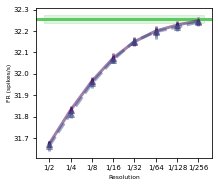

In [19]:
x = [4,8,12,16,20,24,28,32]
l=3 # linewidth

plt.errorbar(x, y1, e1, linestyle='-', marker='^',label='droop',color=colors[0],alpha=0.5,linewidth=l)
eq = plt.errorbar(x, y2, e2, linestyle='dashed', marker='^',label='equal',color=colors[1],alpha=0.5,linewidth=l)
eq[-1][0].set_linestyle('--')
plt.axhline(y=m_c,label='continuous',color=colors[3],linewidth=l)
x2 = [3,4,8,12,16,20,24,28,32,33]
plt.fill_between(x2,y1=m_c-s_c,y2=m_c+s_c,alpha=0.2,color=colors[3])
#plt.legend()
plt.xticks(x,('1/2','1/4','1/8','1/16','1/32','1/64','1/128','1/256'))
plt.xlabel('Resolution',fontsize=6)
plt.ylabel('FR (spikes/s)',fontsize=6, labelpad=1)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
#textstr = 'b)'
#plt.text(-0.03, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\mean_FR_brunel.pdf'.format(fig_path),bbox_inches='tight')
# only for sake of analysis, not including in thesis figure:
#plt.grid()
plt.show();

Large J

In [12]:
largeJ_df = pd.read_pickle('C:\\Users\\Nida\\Documents\\NMBU\\master\\master_thesis_code\\structured_df_large_J.pkl')

In [30]:
y1, e1 = get_mean_std(largeJ_df.loc['droop','FR'])
y2, e2 = get_mean_std(largeJ_df.loc['equal','FR'])
m_c, s_c = get_mean_std_cont(largeJ_df.loc['continuous','FR'][8])

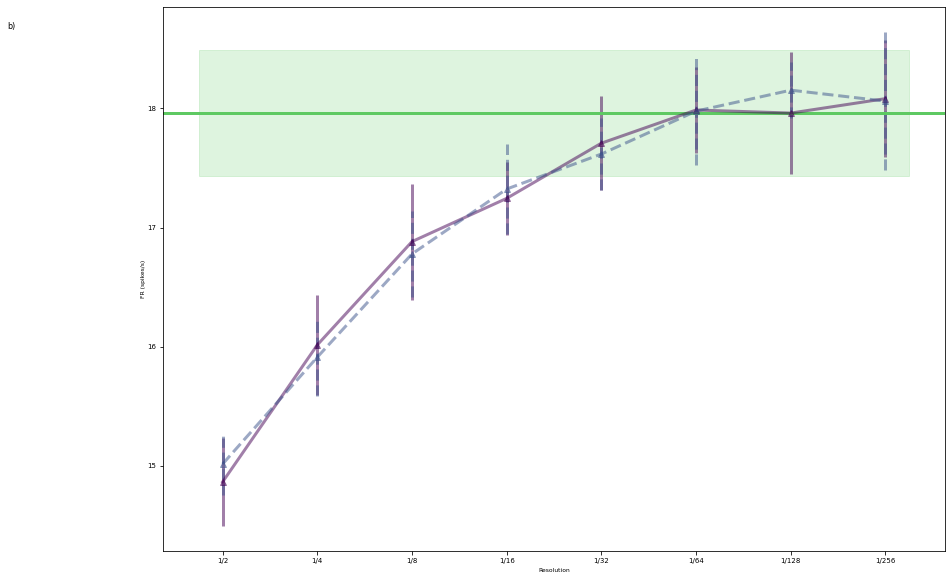

In [31]:
x = [4,8,12,16,20,24,28,32]
l=3 # linewidth

plt.errorbar(x, y1, e1, linestyle='-', marker='^',label='droop',color=colors[0],alpha=0.5,linewidth=l)
eq = plt.errorbar(x, y2, e2, linestyle='dashed', marker='^',label='equal',color=colors[1],alpha=0.5,linewidth=l)
eq[-1][0].set_linestyle('--')
plt.axhline(y=m_c,label='continuous',color=colors[3],linewidth=l)
x2 = [3,4,8,12,16,20,24,28,32,33]
plt.fill_between(x2,y1=m_c-s_c,y2=m_c+s_c,alpha=0.2,color=colors[3])
#plt.legend()
plt.xticks(x,('1/2','1/4','1/8','1/16','1/32','1/64','1/128','1/256'))
plt.xlabel('Resolution',fontsize=6)
plt.ylabel('FR (spikes/s)',fontsize=6, labelpad=1)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
textstr = 'b)'
plt.text(-0.03, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure);
#plt.savefig(r'{}\mean_FR_brunel.pdf'.format(fig_path),bbox_inches='tight')
# only for sake of analysis, not including in thesis figure:
#plt.grid()
plt.show();

# Mean CV as a function of resolution with std errorbar

In [20]:
def get_mean_std(model):
    """
    Retrieve the mean of each cv distribution. The mean is calculated for each of the 10 simulations in each case then 
    the mean of these means are taken, and the std of these 10 means are taken. Store in a list which will be returned.
    """
    res = [2,4,8,16,32,64,128,256]
    means = []
    stds = []
    for r in res:
        means_m = []
        for i in range(1,11):
            me = model[r][i].mean()
            means_m.append(me)
        m, s =  np.mean(means_m), np.std(means_m)
        means.append(m)
        stds.append(s)
    return means, stds


In [21]:
def get_mean_std_cont(model):
    means = []
    for i in range(1,11):
        m = model[i].mean()
        means.append(m)
    return np.mean(means), np.std(means)
        

In [22]:
means, stds = get_mean_std(df.loc['droop','CV'])
means_e, stds_e = get_mean_std(df.loc['equal','CV'])
mean_c, std_c = get_mean_std_cont(df.loc['continuous','CV'][8])

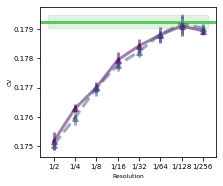

In [23]:
x = [4,8,12,16,20,24,28,32]
l=3 # linewidth
plt.errorbar(x, means, stds, linestyle='-', marker='^',label='droop',color=colors[0],alpha=0.5,linewidth=l)
eq=plt.errorbar(x, means_e, stds_e, linestyle='dashed', marker='^',label='equal',color=colors[1],alpha=0.5,linewidth=l)
eq[-1][0].set_linestyle('--') # get dashed errorbar for equal model
plt.axhline(y=mean_c,label='continuous',color=colors[3],linewidth=l)
x2 = [3,4,8,12,16,20,24,28,32,33]
plt.fill_between(x2,y1=mean_c-std_c,y2=mean_c+std_c,alpha=0.2,color=colors[3])
#plt.legend()
plt.xticks(x,('1/2','1/4','1/8','1/16','1/32','1/64','1/128','1/256'))
plt.xlabel('Resolution',fontsize=6)
plt.ylabel('CV',fontsize=6, labelpad=1);
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
#textstr = 'd)'
#plt.text(-0.03, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\mean_CV_brunel.pdf'.format(fig_path),bbox_inches='tight')

# only for the sake of analysis, not to be included in thesis figure:
#plt.grid()
#plt.show();

Large J

In [36]:
means, stds = get_mean_std(largeJ_df.loc['droop','CV'])
means_e, stds_e = get_mean_std(largeJ_df.loc['equal','CV'])
mean_c, std_c = get_mean_std_cont(largeJ_df.loc['continuous','CV'][8])

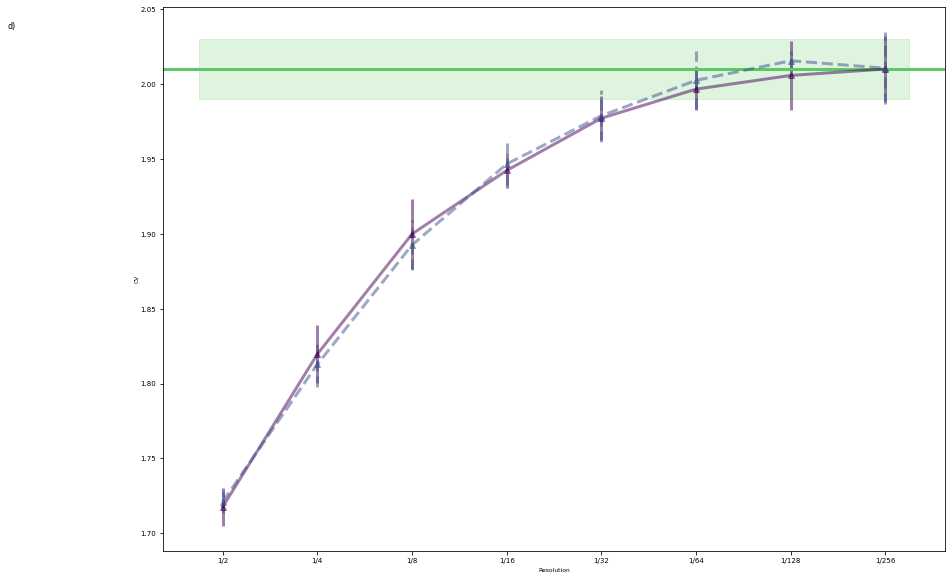

In [37]:
x = [4,8,12,16,20,24,28,32]
l=3 # linewidth
plt.errorbar(x, means, stds, linestyle='-', marker='^',label='droop',color=colors[0],alpha=0.5,linewidth=l)
eq=plt.errorbar(x, means_e, stds_e, linestyle='dashed', marker='^',label='equal',color=colors[1],alpha=0.5,linewidth=l)
eq[-1][0].set_linestyle('--') # get dashed errorbar for equal model
plt.axhline(y=mean_c,label='continuous',color=colors[3],linewidth=l)
x2 = [3,4,8,12,16,20,24,28,32,33]
plt.fill_between(x2,y1=mean_c-std_c,y2=mean_c+std_c,alpha=0.2,color=colors[3])
#plt.legend()
plt.xticks(x,('1/2','1/4','1/8','1/16','1/32','1/64','1/128','1/256'))
plt.xlabel('Resolution',fontsize=6)
plt.ylabel('CV',fontsize=6, labelpad=1);
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
textstr = 'd)'
plt.text(-0.03, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure);
#plt.savefig(r'{}\mean_CV_brunel.pdf'.format(fig_path),bbox_inches='tight')

# only for the sake of analysis, not to be included in thesis figure:
#plt.grid()
#plt.show();

# Mean CC as a funciton of resolution with std error bars

In [24]:
means, stds = get_mean_std(df.loc['droop','CC_5'])
means_e, stds_e = get_mean_std(df.loc['equal','CC_5'])
mean_c, std_c = get_mean_std_cont(df.loc['continuous','CC_5'][8])

In [12]:
np.mean(stds)

0.0029041177382657106

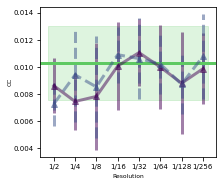

In [25]:
x = [4,8,12,16,20,24,28,32]
l=3
plt.errorbar(x, means, stds, linestyle='-', marker='^',label='droop',color=colors[0],alpha=0.5,linewidth=l)
eq=plt.errorbar(x, means_e, stds_e, linestyle='dashed', marker='^',label='equal',color=colors[1],alpha=0.5,linewidth=l)
eq[-1][0].set_linestyle('--')
plt.axhline(y=mean_c,label='continuous',color=colors[3],linewidth=l)
x2 = [3,4,8,12,16,20,24,28,32,33]
plt.fill_between(x2,y1=mean_c-std_c,y2=mean_c+std_c,alpha=0.2,color=colors[3])
#plt.legend()
plt.xticks(x,('1/2','1/4','1/8','1/16','1/32','1/64','1/128','1/256'))
plt.xlabel('Resolution',fontsize=6)
plt.ylabel('CC',fontsize=6, labelpad=1)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
#textstr = 'f)'
#plt.text(-0.03, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\mean_CC_brunel.pdf'.format(fig_path),bbox_inches='tight')
# only for analysis, do not include in thesis figures:
#plt.grid()
plt.show();

Large J

In [23]:
means, stds = get_mean_std(largeJ_df.loc['droop','CC_5'])
means_e, stds_e = get_mean_std(largeJ_df.loc['equal','CC_5'])
mean_c, std_c = get_mean_std_cont(largeJ_df.loc['continuous','CC_5'][8])

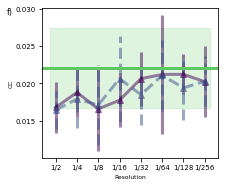

In [24]:
x = [4,8,12,16,20,24,28,32]
l=3
plt.errorbar(x, means, stds, linestyle='-', marker='^',label='droop',color=colors[0],alpha=0.5,linewidth=l)
eq=plt.errorbar(x, means_e, stds_e, linestyle='dashed', marker='^',label='equal',color=colors[1],alpha=0.5,linewidth=l)
eq[-1][0].set_linestyle('--')
plt.axhline(y=mean_c,label='continuous',color=colors[3],linewidth=l)
x2 = [3,4,8,12,16,20,24,28,32,33]
plt.fill_between(x2,y1=mean_c-std_c,y2=mean_c+std_c,alpha=0.2,color=colors[3])
#plt.legend()
plt.xticks(x,('1/2','1/4','1/8','1/16','1/32','1/64','1/128','1/256'))
plt.xlabel('Resolution',fontsize=6)
plt.ylabel('CC',fontsize=6, labelpad=1)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
textstr = 'f)'
plt.text(-0.03, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure);
#plt.savefig(r'{}\mean_CC_brunel.pdf'.format(fig_path),bbox_inches='tight')
# only for analysis, do not include in thesis figures:
#plt.grid()
plt.show();

# Semi-cont Brunel vs. cont

In [5]:
p = 'C:\\Users\\Nida\\Documents\\NMBU\\master\\organized_spike_data\\semi_cont_brunel_df.pkl'
semi_df = pd.read_pickle(p)

In [99]:
semi_df

CV           FR      CC_5     CC_10     CC_20     CC_50
2   1  0     0.176262  0.0325 1/ms  0.022812  0.038135  0.066177 -0.026174
       1     0.177784  0.0324 1/ms -0.004292 -0.019779 -0.005685  0.065774
       2     0.182037  0.0324 1/ms -0.032714 -0.085546 -0.099031 -0.026174
       3     0.179802  0.0321 1/ms  0.026304 -0.002609 -0.018727 -0.036038
       4     0.181406  0.0325 1/ms -0.049676 -0.072938 -0.059902  0.002498
...               ...          ...       ...       ...       ...       ...
256 10 9995   0.16278  0.0323 1/ms  0.010483 -0.019193 -0.039419 -0.024806
       9996  0.188127  0.0319 1/ms  0.015987  0.017055   0.08348  0.099277
       9997  0.195896  0.0322 1/ms  0.031881  0.015545  0.007319  0.061448
       9998  0.174652  0.0323 1/ms  0.001987  0.014029  0.019055  0.050453
       9999  0.172298  0.0316 1/ms -0.015566 -0.047835 -0.072414 -0.057284

[800000 rows x 6 columns]

## FR

In [6]:
def get_mean_std(model):
    """
    Retrieve the mean of each cv distribution. The mean is calculated for each of the 10 simulations in each case then 
    the mean of these means are taken, and the std of these 10 means are taken. Store in a list which will be returned.
    """
    res = [2,4,8,16,32,64,128,256]
    means = []
    stds = []
    for r in res:
        means_m = []
        for i in range(1,11):
            fr = model[r][i].values
            frs = [float(x)*1000 for x in fr]
            me = np.mean(frs)
            means_m.append(me)
        m, s =  np.mean(means_m), np.std(means_m)
        means.append(m)
        stds.append(s)
    return means, stds


In [7]:
def get_mean_std_cont(model):
    means = []
    for i in range(1,11):
        fr = model[i].values
        frs = [float(x)*1000 for x in fr]
        m = np.mean(frs)
        means.append(m)
    return np.mean(means), np.std(means)
        

In [8]:
y, e = get_mean_std(semi_df['FR'])
m_c, s_c = get_mean_std_cont(df.loc['continuous','FR'][8])

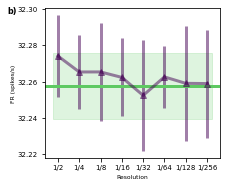

In [13]:
x = [4,8,12,16,20,24,28,32]
l=3 # linewidth

plt.errorbar(x, y, e, linestyle='-', marker='^',label='semi cont',color=colors[0],alpha=0.5,linewidth=l)
plt.axhline(y=m_c,label='continuous',color=colors[3],linewidth=l)
x2 = [3,4,8,12,16,20,24,28,32,33]
plt.fill_between(x2,y1=m_c-s_c,y2=m_c+s_c,alpha=0.2,color=colors[3])
#plt.legend()
plt.xticks(x,('1/2','1/4','1/8','1/16','1/32','1/64','1/128','1/256'))
plt.xlabel('Resolution',fontsize=6)
plt.ylabel('FR (spikes/s)',fontsize=6, labelpad=1);
plt.xticks(fontsize=7)
plt.yticks(fontsize=7);
textstr = 'b)'
plt.text(-0.04, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\semi_cont_fr_brunel.pdf'.format(fig_path),bbox_inches='tight')
# only for analysis, not to be included in thesis figure:
#plt.grid()

## CV

In [14]:
def get_mean_std(model):
    """
    Retrieve the mean of each cv distribution. The mean is calculated for each of the 10 simulations in each case then 
    the mean of these means are taken, and the std of these 10 means are taken. Store in a list which will be returned.
    """
    res = [2,4,8,16,32,64,128,256]
    means = []
    stds = []
    for r in res:
        means_m = []
        for i in range(1,11):
            me = model[r][i].mean()
            means_m.append(me)
        m, s =  np.mean(means_m), np.std(means_m)
        means.append(m)
        stds.append(s)
    return means, stds


In [15]:
def get_mean_std_cont(model):
    means = []
    for i in range(1,11):
        m = model[i].mean()
        means.append(m)
    return np.mean(means), np.std(means)
        

In [16]:
means, stds = get_mean_std(semi_df['CV'])
mean_c, std_c = get_mean_std_cont(df.loc['continuous','CV'][8])

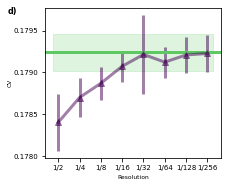

In [17]:
x = [4,8,12,16,20,24,28,32]
l=3 # linewidth
plt.errorbar(x, means, stds, linestyle='-', marker='^',label='semi cont',color=colors[0],alpha=0.5,linewidth=l)
plt.axhline(y=mean_c,label='continuous',color=colors[3],linewidth=l)
x2 = [3,4,8,12,16,20,24,28,32,33]
plt.fill_between(x2,y1=mean_c-std_c,y2=mean_c+std_c,alpha=0.2,color=colors[3])
#plt.legend()
plt.xticks(x,('1/2','1/4','1/8','1/16','1/32','1/64','1/128','1/256'))
plt.xlabel('Resolution',fontsize=6)
plt.ylabel('CV',fontsize=6, labelpad=1)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
textstr = 'd)'
plt.text(-0.04, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\semi_cont_cv_brunel.pdf'.format(fig_path),bbox_inches='tight')
# only for analysis, do not include in thesis figure:
#plt.grid()
plt.show();

## CC (5)

In [18]:
means, stds = get_mean_std(semi_df['CC_5'])

mean_c, std_c = get_mean_std_cont(df.loc['continuous','CC_5'][8])

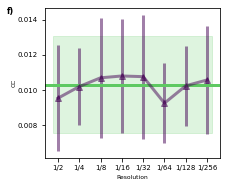

In [19]:
x = [4,8,12,16,20,24,28,32]
l=3 # linewidth
plt.errorbar(x, means, stds, linestyle='-', marker='^',label='semi cont',color=colors[0],alpha=0.5,linewidth=l)
plt.axhline(y=mean_c,label='continuous',color=colors[3],linewidth=l)
x2 = [3,4,8,12,16,20,24,28,32,33]
plt.fill_between(x2,y1=mean_c-std_c,y2=mean_c+std_c,alpha=0.2,color=colors[3])
#plt.legend()
plt.xticks(x,('1/2','1/4','1/8','1/16','1/32','1/64','1/128','1/256'))
plt.xlabel('Resolution',fontsize=6)
plt.ylabel('CC',fontsize=6, labelpad=1)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
textstr = 'f)'
plt.text(-0.04, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\semi_cont_cc_brunel.pdf'.format(fig_path),bbox_inches='tight')
# only for analysis, do not include in thesis figures:
#plt.grid()
plt.show();

In [52]:
m = 9
col = plt.cm.viridis(np.linspace(0, 1, m)) #colorblind friendly

## Ecdf plots FR

In [53]:
def get_mean_list(model):
    fr_list = []
    for i in range(1,11):
        frs = model[i].values
        frs = [float(x)*1000 for x in frs]
        fr_list.append(frs)
    mean_list = np.mean(fr_list,axis=0)
    return mean_list

In [54]:
p01=get_mean_list(semi_df['FR'][2])
p02=get_mean_list(semi_df['FR'][4])
p03=get_mean_list(semi_df['FR'][8])
p04=get_mean_list(semi_df['FR'][16])
p05=get_mean_list(semi_df['FR'][32])
p06=get_mean_list(semi_df['FR'][64])
p07=get_mean_list(semi_df['FR'][128])
p08=get_mean_list(semi_df['FR'][256])

p09=get_mean_list(df.loc['continuous','FR'][8])


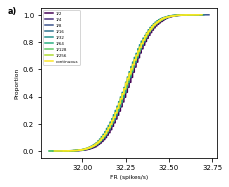

In [55]:
# droop models
plt.plot(np.sort(p01), np.linspace(0, 1, len(p01), endpoint=False),color=col[0],label='1/2')
plt.plot(np.sort(p02), np.linspace(0, 1, len(p02), endpoint=False),color=col[1],label='1/4')
plt.plot(np.sort(p03), np.linspace(0, 1, len(p03), endpoint=False),color=col[2],label='1/8')
plt.plot(np.sort(p04), np.linspace(0, 1, len(p04), endpoint=False),color=col[3],label='1/16')
plt.plot(np.sort(p05), np.linspace(0, 1, len(p05), endpoint=False),color=col[4],label='1/32')
plt.plot(np.sort(p06), np.linspace(0, 1, len(p06), endpoint=False),color=col[5],label='1/64')
plt.plot(np.sort(p07), np.linspace(0, 1, len(p07), endpoint=False),color=col[6],label='1/128')#medium green
plt.plot(np.sort(p08), np.linspace(0, 1, len(p08), endpoint=False),color=col[7],label='1/256') #light green

# continuous model
plt.plot(np.sort(p09), np.linspace(0, 1, len(p09), endpoint=False),color=col[8],label='continuous') # yellow
plt.xlabel('FR (spikes/s)',fontsize=6);
plt.ylabel('Proportion',fontsize=6);
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.legend(prop={'size': 4})
textstr = 'a)'
plt.text(-0.025, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\semi_cont_fr_brunel_ecdf.pdf'.format(fig_path),bbox_inches='tight')

## Ecdf plots CV

In [56]:
def get_mean_list(model):
    cv_list = []
    for i in range(1,11):
        cvs = model[i].values
        cv_list.append(cvs)
    mean_list = np.mean(cv_list,axis=0)
    return mean_list

In [57]:
p01=get_mean_list(semi_df['CV'][2])
p02=get_mean_list(semi_df['CV'][4])
p03=get_mean_list(semi_df['CV'][8])
p04=get_mean_list(semi_df['CV'][16])
p05=get_mean_list(semi_df['CV'][32])
p06=get_mean_list(semi_df['CV'][64])
p07=get_mean_list(semi_df['CV'][128])
p08=get_mean_list(semi_df['CV'][256])

p09=get_mean_list(df.loc['continuous','CV'][8])


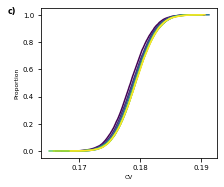

In [58]:
# droop models
plt.plot(np.sort(p01), np.linspace(0, 1, len(p01), endpoint=False),color=col[0],label='1/2')
plt.plot(np.sort(p02), np.linspace(0, 1, len(p02), endpoint=False),color=col[1],label='1/4')
plt.plot(np.sort(p03), np.linspace(0, 1, len(p03), endpoint=False),color=col[2],label='1/8')
plt.plot(np.sort(p04), np.linspace(0, 1, len(p04), endpoint=False),color=col[3],label='1/16')
plt.plot(np.sort(p05), np.linspace(0, 1, len(p05), endpoint=False),color=col[4],label='1/32')
plt.plot(np.sort(p06), np.linspace(0, 1, len(p06), endpoint=False),color=col[5],label='1/64')
plt.plot(np.sort(p07), np.linspace(0, 1, len(p07), endpoint=False),color=col[6],label='1/128')#medium green
plt.plot(np.sort(p08), np.linspace(0, 1, len(p08), endpoint=False),color=col[7],label='1/256') #light green

# continuous model
plt.plot(np.sort(p09), np.linspace(0, 1, len(p09), endpoint=False),color=col[8],label='continuous') # yellow
plt.xlabel('CV',fontsize=6);
plt.ylabel('Proportion',fontsize=6);
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
#plt.legend()
textstr = 'c)'
plt.text(-0.025, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\semi_cont_cv_brunel_ecdf.pdf'.format(fig_path),bbox_inches='tight')

## Ecdf plots CC

In [59]:
def get_mean_list(model):
    cv_list = []
    for i in range(1,11):
        cvs = model[i].values
        cv_list.append(cvs)
    mean_list = np.mean(cv_list,axis=0)
    return mean_list

In [60]:
p01=get_mean_list(semi_df['CC_5'][2])
p02=get_mean_list(semi_df['CC_5'][4])
p03=get_mean_list(semi_df['CC_5'][8])
p04=get_mean_list(semi_df['CC_5'][16])
p05=get_mean_list(semi_df['CC_5'][32])
p06=get_mean_list(semi_df['CC_5'][64])
p07=get_mean_list(semi_df['CC_5'][128])
p08=get_mean_list(semi_df['CC_5'][256])

p09=get_mean_list(df.loc['continuous','CC_5'][8])


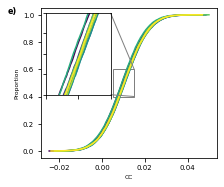

In [61]:
fig, ax = plt.subplots()
# droop models
ax.plot(np.sort(p01), np.linspace(0, 1, len(p01), endpoint=False),color=col[0],label='1/2')
ax.plot(np.sort(p02), np.linspace(0, 1, len(p02), endpoint=False),color=col[1],label='1/4')
ax.plot(np.sort(p03), np.linspace(0, 1, len(p03), endpoint=False),color=col[2],label='1/8')
ax.plot(np.sort(p04), np.linspace(0, 1, len(p04), endpoint=False),color=col[3],label='1/16')
ax.plot(np.sort(p05), np.linspace(0, 1, len(p05), endpoint=False),color=col[4],label='1/32')
ax.plot(np.sort(p06), np.linspace(0, 1, len(p06), endpoint=False),color=col[5],label='1/64')
ax.plot(np.sort(p07), np.linspace(0, 1, len(p07), endpoint=False),color=col[6],label='1/128')#medium green
ax.plot(np.sort(p08), np.linspace(0, 1, len(p08), endpoint=False),color=col[7],label='1/256') #light green

# continuous model
ax.plot(np.sort(p09), np.linspace(0, 1, len(p09), endpoint=False),color=col[8],label='continuous') # yellow
plt.xlabel('CC',fontsize=6);
plt.ylabel('Proportion',fontsize=6);
plt.xticks(fontsize=7)
plt.yticks(fontsize=7);
#plt.legend()

# code to fix zoomed in version
axins1 = zoomed_inset_axes(ax, zoom = 3, loc=2)
axins1.plot(np.sort(p01),np.linspace(0, 1, len(p01), endpoint=False),color=col[0])
axins1.plot(np.sort(p02),np.linspace(0, 1, len(p02), endpoint=False),color=col[1])
axins1.plot(np.sort(p03), np.linspace(0, 1, len(p03), endpoint=False),color=col[2])
axins1.plot(np.sort(p04), np.linspace(0, 1, len(p04), endpoint=False),color=col[3])
axins1.plot(np.sort(p05), np.linspace(0, 1, len(p05), endpoint=False),color=col[4])
axins1.plot(np.sort(p06), np.linspace(0, 1, len(p06), endpoint=False),color=col[5])
axins1.plot(np.sort(p07), np.linspace(0, 1, len(p07), endpoint=False),color=col[6])
axins1.plot(np.sort(p08), np.linspace(0, 1, len(p08), endpoint=False),color=col[7])
 
# continuous model
axins1.plot(np.sort(p09), np.linspace(0, 1, len(p09), endpoint=False),color=col[8])
# SPECIFY THE LIMITS
x1, x2, y1, y2 = 0.005, 0.015, 0.4, 0.6
axins1.set_xlim(x1, x2)
axins1.set_ylim(y1, y2)

plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins1, loc1=1, loc2=4, fc="none", ec="0.5");
textstr = 'e)'
plt.text(-0.025, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\semi_cont_cc_brunel_ecdf.pdf'.format(fig_path),bbox_inches='tight')